Welcome to the Practice Session 10! 

In [1]:
import YData 

#YData.download_practice_code(10)              # Without Answers. 
#YData.download_practice_code(10, True)        # With Answers (won't work until Thursday evening).




# Packages/Libraries.
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline


# Data.
YData.download_data("loan_data.csv")


In [2]:
# Income DataFrame. 

loans = pd.read_csv("loan_data.csv")
income = loans.drop(columns = ["loan_amnt", "loan_intent", "loan_int_rate", "loan_percent_income", "loan_status"])
display(income.head(3), income.shape)

,person_age,person_gender,person_education,person_income,person_emp_exp,person_home_ownership,cb_person_cred_hist_length,credit_score,previous_loan_defaults_on_file
0,22.0,female,Master,71948.0,0,RENT,3.0,561,No
1,21.0,female,High School,12282.0,0,OWN,2.0,504,Yes
2,25.0,female,High School,12438.0,3,MORTGAGE,3.0,635,No


(45000, 9)

# Linear Regression

In regression, we try to predict a quantitative variable $y$ (called the response variable), from a set of features (predictors) $X$. 

Let us build a linear regression model to predict $y =$ `person_income` (the person's income in USD) using other quantitative predictors in the above DataFrame. 



### Preliminary Data Exploration

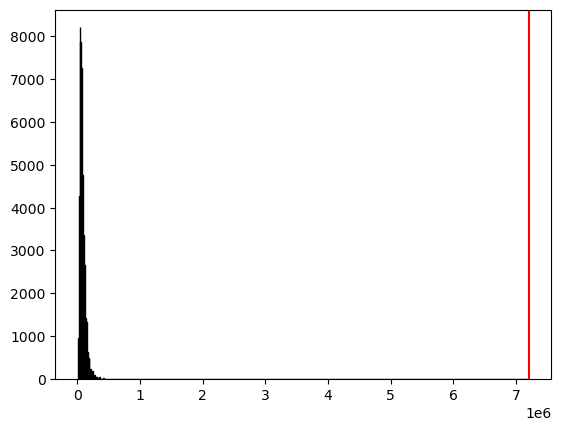

In [3]:
# Histogram of the person_income. 
plt.hist(income["person_income"], bins = 500, edgecolor = "black");
plt.axvline(max(income["person_income"]), color = "r");


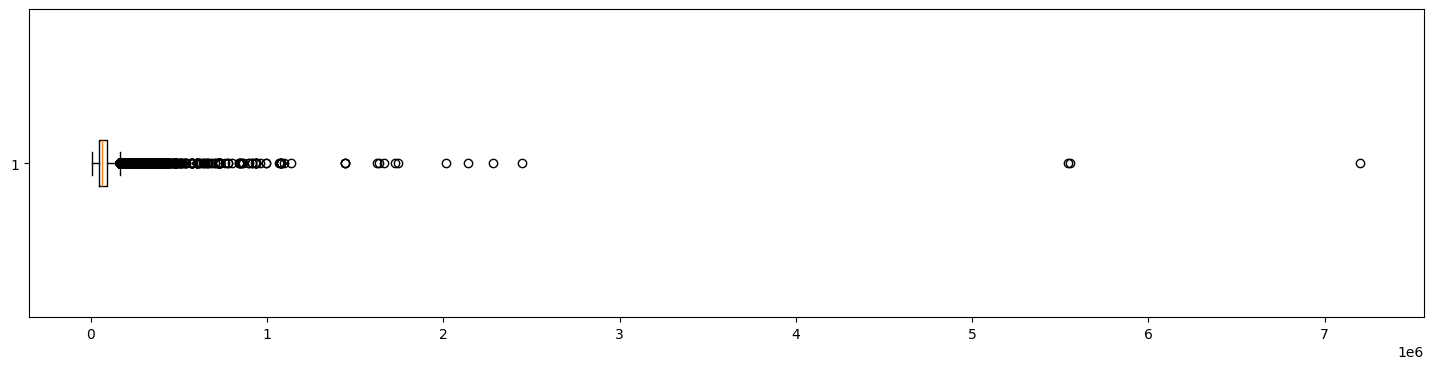

In [5]:
# Boxplot of the person_income. 
plt.figure(figsize = (18,4));
plt.boxplot(income["person_income"], vert = False);

##### Always check assumptions! 

One of the key assumptios of Classical Linear Regression Model requires the response variable $y$ to have **bell-shaped** distribution. However, we can clearly see from the above Histogram that `person_income` doesn't seem to have a bell shaped distribution. In such situations, one usually needs to transform the original response variable $y$ so that the resulting transformed variable has a **bell-shaped** distribution. 

In particular, when dealing with salaries (incomes) data, the $\underline{\text{log transform}}$ is a good choice. 





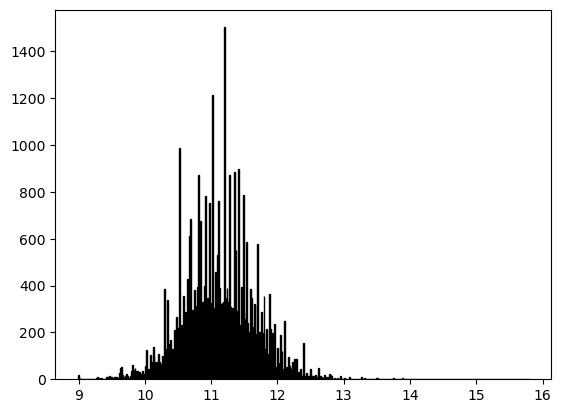

In [6]:
# Histogram of the log transform of person_income. 

log_income = np.log(income["person_income"])
plt.hist(log_income, bins = 500, edgecolor = "black");



In [7]:
# Let us add log_income to the DataFrame.
income["log_income"] = log_income


# Let us also create a new DataFrame which contains only the relevant variables. 
log_income_df = income.drop(columns = ["person_gender", "person_education", "person_home_ownership", "previous_loan_defaults_on_file",
                                       "person_income"])
log_income_df.head(5)


,person_age,person_emp_exp,cb_person_cred_hist_length,credit_score,log_income
0,22.0,0,3.0,561,11.183699
1,21.0,0,2.0,504,9.415890
2,25.0,3,3.0,635,9.428512
3,23.0,0,2.0,675,11.286690
4,24.0,1,4.0,586,11.099453


### Simple Linear Regression

###### Recall that Simple Linear Regression is method of using one predictor variable $x$ to predict the value of a second variable $y$ (called the response variable). So, let us first investigate which predictor variable seems to be the most appropirate in predicting log_income. 

In [8]:
# Let us compute all pairwise correlations to see which feature variable has the most predictive power. 

log_income_df.corr()


,person_age,person_emp_exp,cb_person_cred_hist_length,credit_score,log_income
person_age,1.000000,0.954412,0.861985,0.178432,0.131004
person_emp_exp,0.954412,1.000000,0.824272,0.186196,0.118451
cb_person_cred_hist_length,0.861985,0.824272,1.000000,0.155204,0.103123
credit_score,0.178432,0.186196,0.155204,1.000000,0.028839
log_income,0.131004,0.118451,0.103123,0.028839,1.000000


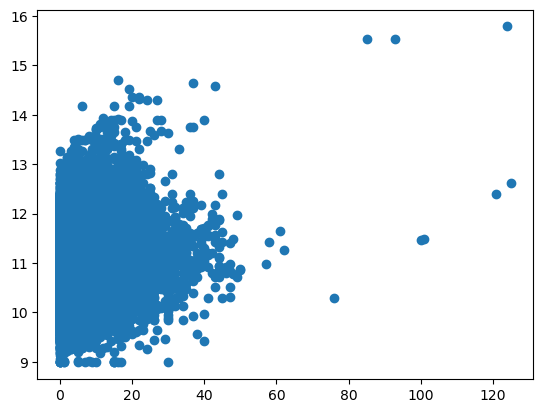

In [9]:
# If you have to choose exactly one predictor variable, which one will you choose?
# Answer: person_emp_exp


# Plot your chosen predictor variable on the x-axis and the response log_income on the y-axis using a scatterplot.  
plt.scatter(log_income_df["person_emp_exp"], log_income_df["log_income"]);



#### Based on your answer above, fit a simple linear regression model to predict `log_income`. 



###### **RECALL** that geometrically speaking, we want to find the line that "best" fits the scatterplot above. Mope precisely, the coefficients (slope and intercept) for the "best" fit are found by minimizing root mean square error (RMSE). 

RMSE $ = \sqrt{\frac{1}{n}\sum_{i=1}^{n} \Big(y_i - (b_0 + b_1{x_i}) \Big)^2 }$

In [10]:
# Step 0.



# Store features and response variable in two separate DataFrames. 
X_feature = log_income_df["person_emp_exp"]
y_response = log_income_df["log_income"]




# Split the data into training and tests. 
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_feature, y_response, random_state = 0, test_size = 0.5)
print(X_train.shape[0])
print(X_test.shape[0])



# We need to make X_train and X_test two dimensional for it to work with sklearn package/library. 
# You may ignore this code. 
X_train = np.array(X_train).reshape(-1,1)
X_test = np.array(X_test).reshape(-1,1)
X_train


22500
22500


array([[3],
       [0],
       [7],
       ...,
       [6],
       [4],
       [0]], shape=(22500, 1))

In [11]:
# Step 1. 
# Create/construct a simple linear regression model.


from sklearn.linear_model import LinearRegression
slr_model = LinearRegression()






In [12]:
# Step 2. 
# Fit the model to our training data.

slr_model.fit(X_train, y_train)



LinearRegression()

In [14]:
# Step 3.
# Make predictions of the salaries on the test data.

predictions = slr_model.predict(X_test)
predictions[:10]


array([11.10588457, 11.05881084, 11.117653  , 11.10588457, 11.05881084,
       11.08234771, 11.1529583 , 11.32948479, 11.05881084, 11.05881084])

We can assess the accuracy of our predictons using the root mean squared error RMSE which is defined as: 

$$RMSE = \sqrt{ \frac{1}{n}\sum_{i=1}^{n} (y_i - \hat{y}_i)^2}$$

Here $\hat{y}$ is the predictions made by our linear model on the test data and y is the actual log_income data stored in our test set.


In [17]:
# Step 4.
# RMSE on the test data.

RMSE_test = (np.mean((y_test - predictions) ** 2)) ** (1/2)
RMSE_test 




np.float64(0.5484357416293728)

### Multiple Linear Regression

In Multiple Linear Regression we try to predict the response variable $y$ using several features $x_1, x_2, ...., x_k$ and hence, our predicted $\hat{y}$ values are given by the equation $\hat{y} = b_0 + b_1 x_1 + ... + + b_k x_k$.

Next build a Mulitple Linear Regression model using all the quantitative variables in the DataFrame `log_income`.


In [18]:
# Step 0.



# Store features and response variable in two separate DataFrames. 
X_feature_2 = log_income_df[["person_age", "person_emp_exp", "cb_person_cred_hist_length", "credit_score"]]
y_response_2 = log_income_df["log_income"]




# Split the data into training and tests. 
from sklearn.model_selection import train_test_split
X_train_2, X_test_2, y_train_2, y_test_2 = train_test_split(X_feature_2, y_response_2, random_state = 0, test_size = 0.5)
print(X_train_2.shape[0])
print(X_test_2.shape[0])





22500
22500


In [19]:
# Step 1. 
# Create/construct a multiple linear regression model.


from sklearn.linear_model import LinearRegression
mlr_model = LinearRegression()

In [20]:
# Step 2. 
# Fit the model to our training data.

mlr_model.fit(X_train_2, y_train_2)

LinearRegression()

In [21]:
# Step 3.
# Make predictions of the salaries on the test data.

predictions_2 = mlr_model.predict(X_test_2)
predictions_2[:10]

array([11.1005626 , 11.04017094, 11.10459028, 11.08412114, 11.10972254,
       11.05210977, 11.0895672 , 11.34829784, 11.07442444, 11.04852265])

In [22]:
# Step 4.
# RMSE on the test data

RMSE_test_2 = np.sqrt(np.mean((y_test_2 - predictions_2)**2))
RMSE_test_2  

np.float64(0.5475823823980192)

#### How to get intercept and slope coefficients from the fitted model `mlr_model`?

In [25]:
# Get the intercept and slope coefficients.

sklearn_intercept = mlr_model.intercept_
sklearn_coefficients = mlr_model.coef_


# Print out the coefficient values.
(sklearn_intercept, sklearn_coefficients)  


(np.float64(10.52111628606008),
 array([ 2.33626751e-02, -8.18429522e-03, -4.30101823e-03,  3.57622462e-05]))

- Given these coefficient values can you write our the regression equation for predicting person's salary? 
- Answer: $ \hat{y} = 10.52 + (0.02)x_1 + (-0.008)x_2 + (-0.004)x_3 + (0.00003)x_4 $

##### Side Note: Instead of plain vanilla train-test split, one could also employ cross validation method.

In [26]:
# using cross-validation
from sklearn.model_selection import cross_val_score

linear_model = LinearRegression()

scores = cross_val_score(linear_model, 
                         X_feature_2,  
                         y_response_2, 
                         cv = 5, 
                         scoring='neg_mean_squared_error')

np.sqrt(np.mean(-1 * scores))

np.float64(0.5667536217044593)

## Inference on regression coefficients

We can also run inference procedures on our regression model using the statsmodel package. In particular, we can run hypothesis tests and create confidence intervals for our regression coefficents. 

When running a hypothesis test, our hypotheses are:

$H_0: \beta_i = 0$  
$H_A: \beta_i \ne 0$


##### Please use the OLS Regression Outputs Below to check which regression coefficients in the `mlr_model` are statistically significantly different from zero?

In [27]:
# Hypothesis test on regression coeffients - which coefficients are statistically significantly different from zero? 

import statsmodels.api as sm

# add a constant value of 1 to our data
X_train_with_constant = sm.add_constant(X_train_2) 

# fit the linear regression model using the OLS function
sm_linear_model = sm.OLS(y_train_2, X_train_with_constant).fit()

# get information on the regression coefficients found
print(sm_linear_model.summary())



                            OLS Regression Results                            
Dep. Variable:             log_income   R-squared:                       0.020
Model:                            OLS   Adj. R-squared:                  0.020
Method:                 Least Squares   F-statistic:                     116.0
Date:                Wed, 23 Apr 2025   Prob (F-statistic):           3.86e-98
Time:                        11:00:38   Log-Likelihood:                -18775.
No. Observations:               22500   AIC:                         3.756e+04
Df Residuals:                   22495   BIC:                         3.760e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const               

- Would you drop `credit_score`? Why?
- Answer: $p$-value for the `credit_score` coefficient is greater than 0.05. Hence, we can't reject the Null at the significance level $0.05$. One remedy is to drop `credit_score` from the model and re-run the multiple regression model with other remaining quantitative variables. We can then compare the two models based on RMSE or other measures. 

# Take Home Problem: Linear Regression with categorical features 

In [34]:
# Let us recall our dataset. 

log_income_df.head(3)

,person_age,person_emp_exp,cb_person_cred_hist_length,credit_score,log_income,gender
0,22.0,0,3.0,561,11.183699,1
1,21.0,0,2.0,504,9.415890,1
2,25.0,3,3.0,635,9.428512,1


In [35]:
# Let us insert a new column (called gender)in the DataFrame log_income_df 
# so that Male is coded as 0 and Female is coded as 1.


# Creating desired column in the original DataFrame loans. 
loans["gender"] = 1
gender_bool = loans["person_gender"] == "male"
loans.loc[gender_bool, 'gender'] = 0 


# Now insert into DataFrame log_income_df.
log_income_df["gender"] = loans["gender"]
log_income_df.head()




,person_age,person_emp_exp,cb_person_cred_hist_length,credit_score,log_income,gender
0,22.0,0,3.0,561,11.183699,1
1,21.0,0,2.0,504,9.415890,1
2,25.0,3,3.0,635,9.428512,1
3,23.0,0,2.0,675,11.286690,1
4,24.0,1,4.0,586,11.099453,0


### Run Linear Regression with your choice of features but make sure to include `gender` as one of your features. 

In [37]:
# get the features and the labels.

X_feature_3 = log_income_df[[ "person_age", "person_emp_exp", "cb_person_cred_hist_length", "credit_score", "gender"]]

y_response_3 = log_income_df["log_income"]




In [38]:
from sklearn.model_selection import train_test_split

# split data into a training and test set

X_train_3, X_test_3, y_train_3, y_test_3 = train_test_split(X_feature_3, y_response_3, random_state = 0, test_size = 0.5)

print(X_train_3.shape)
print(X_test_3.shape)

X_train_3.head(5)


(22500, 5)
(22500, 5)


,person_age,person_emp_exp,cb_person_cred_hist_length,credit_score,gender
1569,24.0,3,4.0,662,1
2340,21.0,0,3.0,584,1
36401,31.0,7,8.0,698,0
43315,26.0,2,5.0,662,0
26538,30.0,7,10.0,652,1


#### Use the output below to answer the following questions: 

- Gender coefficient is $______$.
- What does this mean?


- What is the $p$-value associated with Gender coefficient and how to interpret it?
- Answer: 

In [45]:
# Hypothesis test on regression coeffients - which coefficients are statistically significantly different from zero? 
# (and confidence interval)

import statsmodels.api as sm

# add a constant value of 1 to our data
X_train_with_constant_2 = sm.add_constant(X_train_3) 

# fit the linear regression model using the OLS function
sm_linear_model = sm.OLS(y_train_3, X_train_with_constant_2).fit()

# get information on the regression coefficients found
print(sm_linear_model.summary())


                            OLS Regression Results                            
Dep. Variable:             log_income   R-squared:                       0.020
Model:                            OLS   Adj. R-squared:                  0.020
Method:                 Least Squares   F-statistic:                     93.41
Date:                Wed, 23 Apr 2025   Prob (F-statistic):           1.09e-97
Time:                        11:16:52   Log-Likelihood:                -18773.
No. Observations:               22500   AIC:                         3.756e+04
Df Residuals:                   22494   BIC:                         3.761e+04
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const               